torch.Size([128, 3, 64, 64])


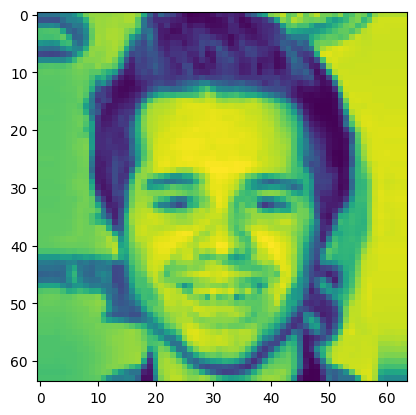

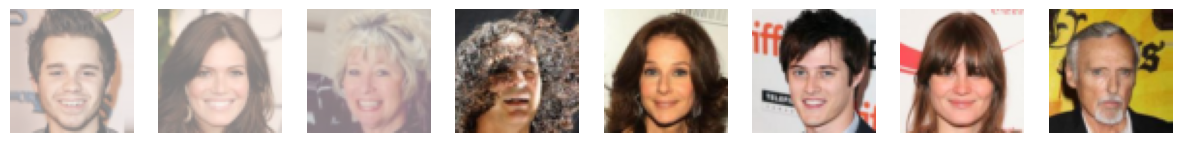

In [1]:
import matplotlib.pyplot as plt
import torchvision.datasets as datasets
from torchvision import transforms
import torch
# Define transformations
transform = transforms.Compose([
    transforms.Resize(64),          # Resize to DCGAN's output size
    transforms.CenterCrop(64),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])


# Load images from folder using ImageFolder
dataset = datasets.ImageFolder(
    root='./data/celeba/',  # Path to images folder
    transform=transform
)

# Create DataLoader
dataloader = torch.utils.data.DataLoader(
    dataset,
    batch_size=128,
    shuffle=True
)


# Helper function to denormalize and display images
def denormalize(tensor, mean, std):
    for t, m, s in zip(tensor, mean, std):
        t.mul_(s).add_(m)  # Reverse normalization
    return tensor


def show_images(images, nrow=4):
    # Reorder to (batch_size, height, width, channels)
    images = images.permute(0, 2, 3, 1)
    fig, axes = plt.subplots(1, nrow, figsize=(15, 5))
    for i in range(nrow):
        img = (images[i] + 1) / 2  # Rescale from [-1, 1] to [0, 1]
        axes[i].imshow(img.numpy())
        axes[i].axis("off")
    plt.show()


# Load a single batch
batch = next(iter(dataloader))  # Get one batch
images, _ = batch  # ImageFolder returns images and class labels, ignore labels

print(images.shape)
plt.imshow(images[0][0])
# # Denormalize and display
images = denormalize(images, mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
show_images(images, nrow=8)  # Display batch
